# protostars
## 25- Publication quality figures
### I. First round

Nearing the end!

In [1]:
import pandas as pd

In [3]:
raw_mods = np.load('../sf/exp12/output/bb_absolute/run02/raw_models.npy')

In [4]:
raw_mods.shape

(5000, 40)

In [5]:
star, disk, extinc, cheb = (raw_mods[4989][9][i, :] for i in range(4))

In [6]:
import h5py

f = h5py.File("../data/reduced/S68N_NIRSPEC_CO_NaI.hdf5", "r")

wl = np.array(f['wls'])
fl = np.array(f['fls'])
sig = np.array(f['sigmas'])

f.close()

In [7]:
sns.set_context('paper')
sns.set_style('ticks')

In [8]:
CC = np.load('../sf/exp12/output/bb_absolute/run02/CC_new.npy')

(0, 35)

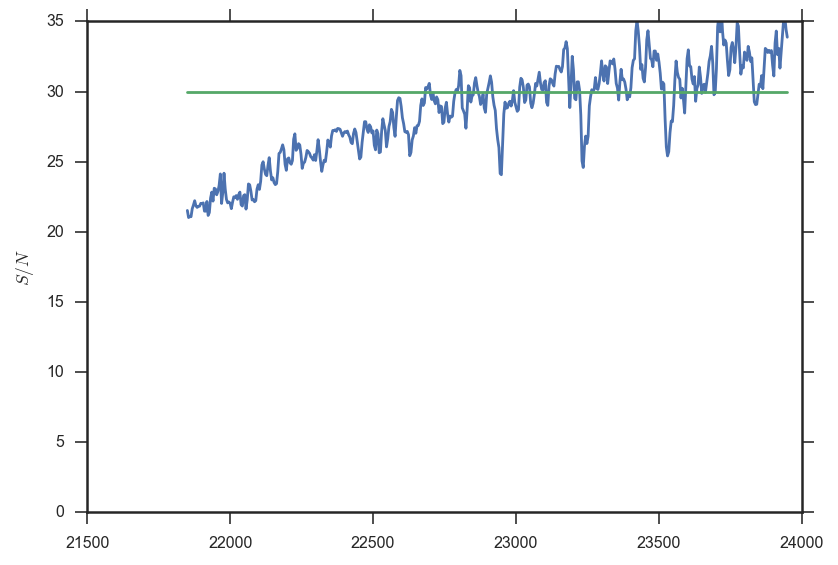

In [9]:
plt.plot(wl, fl/np.sqrt(CC.diagonal()))
plt.plot(wl, fl/sig)
plt.ylabel('$S/N$')
plt.ylim(0, 35)

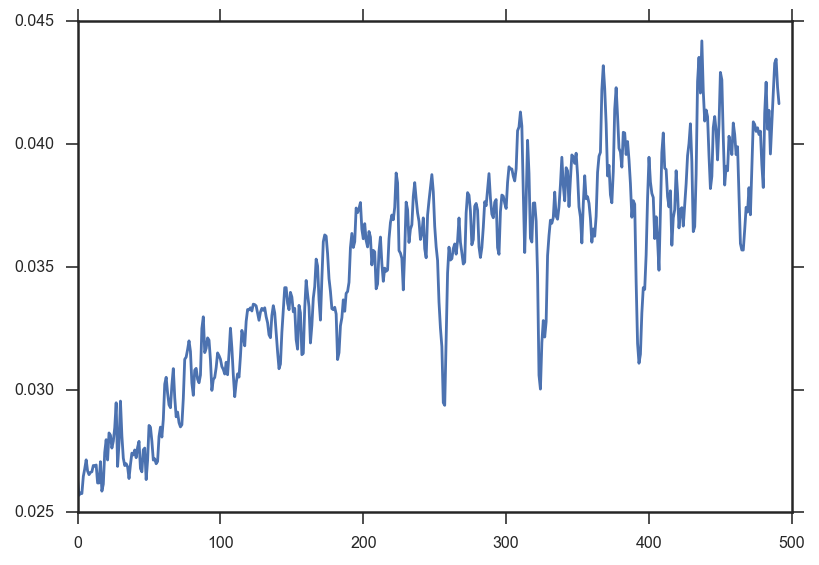

In [10]:
plt.plot(sig)

Wow.  I input a constant $S/N$, and somehow the algorithm chose a more appropriate noise model.  wtf!

In [11]:
CC_diag = np.diagflat(CC.diagonal())
CC_orig = np.diagflat(sig**2)

In [12]:
CC.shape

(492, 492)

In [13]:
CC.max()

0.0014082120213622367

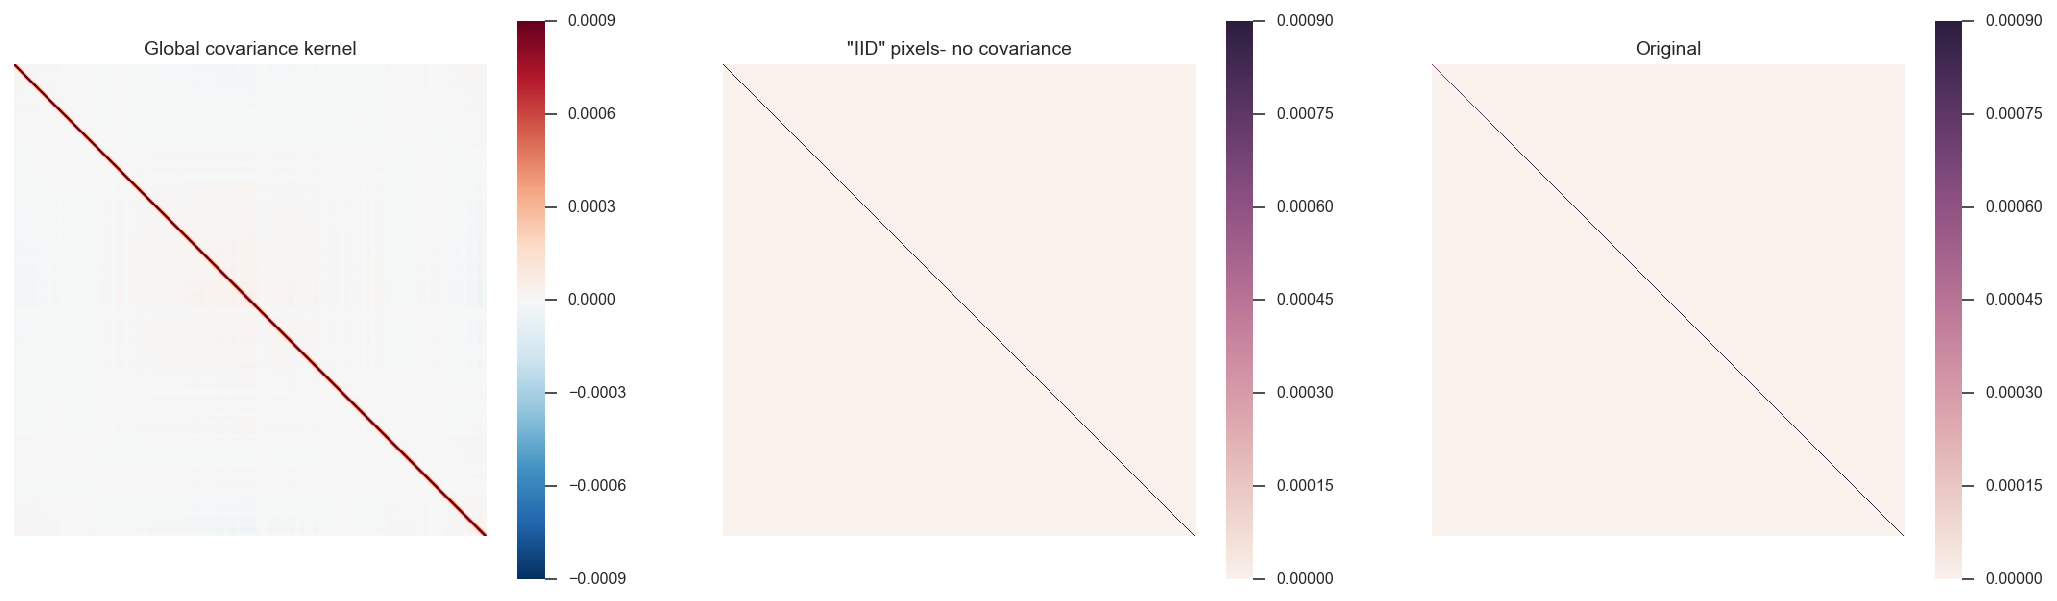

In [14]:
plt.figure(figsize=(18, 5))
plt.subplot(131)
sns.heatmap(CC, xticklabels=False, yticklabels=False, vmax=9.0e-4, square=True)
plt.title('Global covariance kernel')
plt.subplot(132)
sns.heatmap(CC_diag, xticklabels=False, yticklabels=False, vmax=9.0e-4, square=True)
plt.title('"IID" pixels- no covariance')
plt.subplot(133)
sns.heatmap(CC_orig, xticklabels=False, yticklabels=False, vmax=9.0e-4, square=True)
plt.title('Original')

In [15]:
net_model = star+disk

In [16]:
from scipy.stats import multivariate_normal

In [17]:
nz_draw = multivariate_normal(net_model, CC)
nz_draw_d = multivariate_normal(net_model, CC_diag)
nz_draw_o = multivariate_normal(net_model, CC_orig)

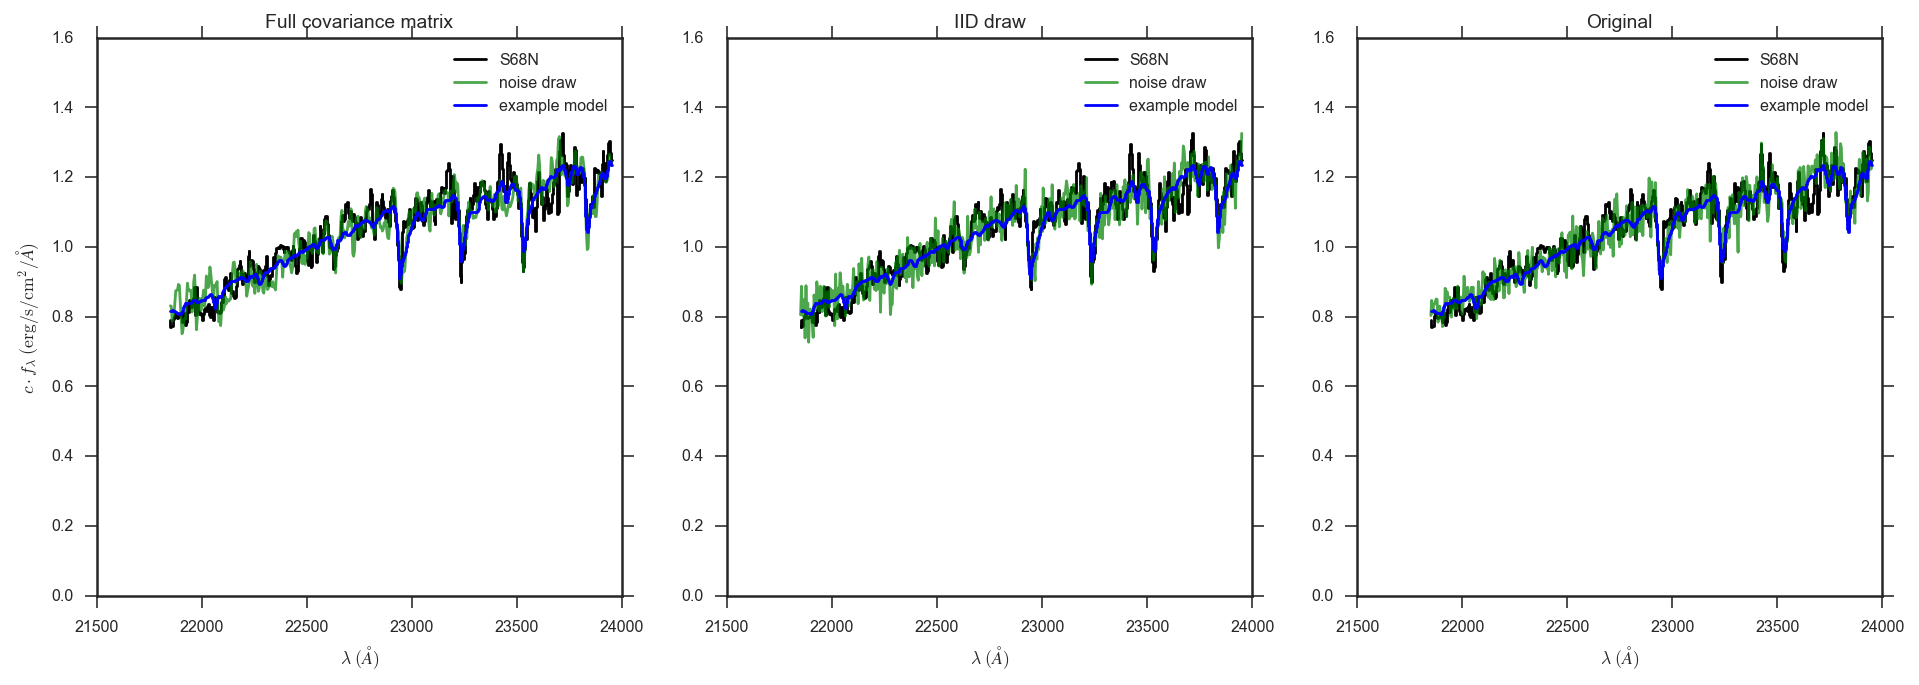

In [18]:
plt.figure(figsize=(16, 5))
plt.subplot(131)
plt.step(wl, fl, 'k', label='S68N')
plt.plot(wl, nz_draw.rvs(), 'g-', alpha=0.7, label='noise draw')
plt.step(wl, net_model, 'b', label='example model')

plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$c\cdot f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('Full covariance matrix')
plt.legend(loc='best')
plt.ylim(0, 1.3*np.percentile(fl, 95))

plt.subplot(132)
plt.step(wl, fl, 'k', label='S68N')
plt.plot(wl, nz_draw_d.rvs(), 'g-', alpha=0.7, label='noise draw')
plt.step(wl, net_model, 'b', label='example model')

plt.xlabel('$\lambda \;(\AA)$')
plt.title('IID draw')
plt.legend(loc='best')
plt.ylim(0, 1.3*np.percentile(fl, 95))

plt.subplot(133)
plt.step(wl, fl, 'k', label='S68N')
plt.plot(wl, nz_draw_o.rvs(), 'g-', alpha=0.7, label='noise draw')
plt.step(wl, net_model, 'b', label='example model')

plt.xlabel('$\lambda \;(\AA)$')
plt.title('Original')
plt.legend(loc='best')
plt.ylim(0, 1.3*np.percentile(fl, 95))

plt.yscale('linear')

In [19]:
nz_draw = multivariate_normal(fl*0.0, CC)
nz_draw_d = multivariate_normal(fl*0.0, CC_diag)
nz_draw_o = multivariate_normal(fl*0.0, CC_orig)

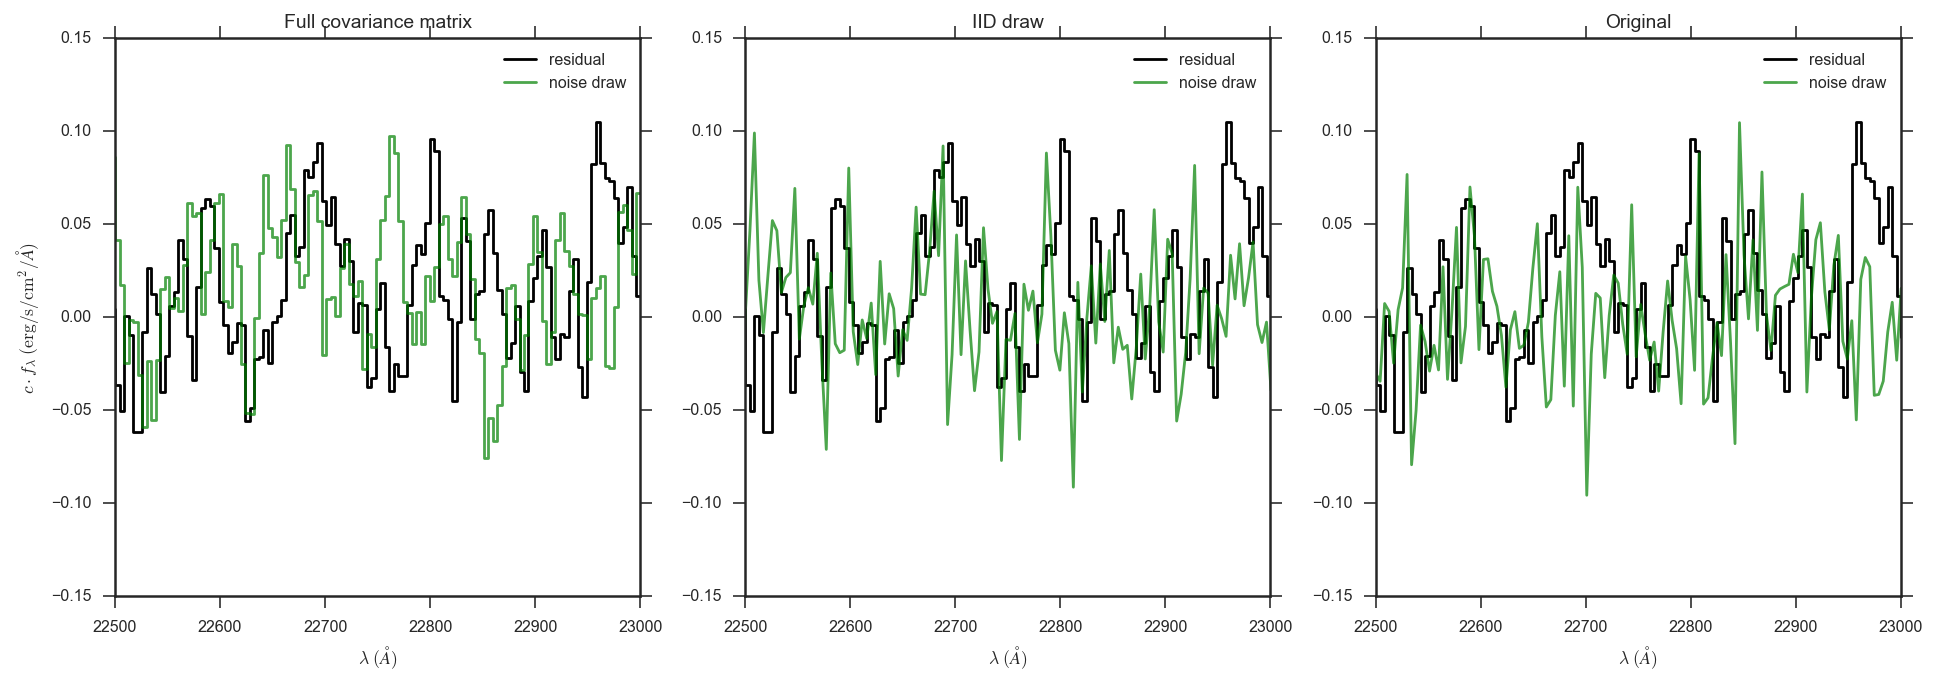

In [20]:
plt.figure(figsize=(16, 5))
plt.subplot(131)
plt.step(wl, fl-net_model, 'k', label='residual')
plt.step(wl, nz_draw.rvs(), 'g', alpha=0.7, label='noise draw')

plt.xlim(22500, 23000)
plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$c\cdot f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('Full covariance matrix')
plt.legend(loc='best')
#plt.ylim(0, 1.3*np.percentile(fl, 95))

plt.subplot(132)
plt.step(wl, fl-net_model, 'k', label='residual')
plt.plot(wl, nz_draw_d.rvs(), 'g-', alpha=0.7, label='noise draw')

plt.xlabel('$\lambda \;(\AA)$')
plt.title('IID draw')
plt.legend(loc='best')
plt.xlim(22500, 23000)
#plt.ylim(0, 1.3*np.percentile(fl, 95))

plt.subplot(133)
plt.step(wl, fl-net_model, 'k', label='residual')
plt.plot(wl, nz_draw_o.rvs(), 'g-', alpha=0.7, label='noise draw')

plt.xlim(22500, 23000)
plt.xlabel('$\lambda \;(\AA)$')
plt.title('Original')
plt.legend(loc='best')
#plt.ylim(0, 0.2*np.percentile(fl, 95))

plt.yscale('linear')

Is the full covariance matrix using an accurate correlation scale length, $l$?

In [21]:
resid = fl - net_model

(0, 110)

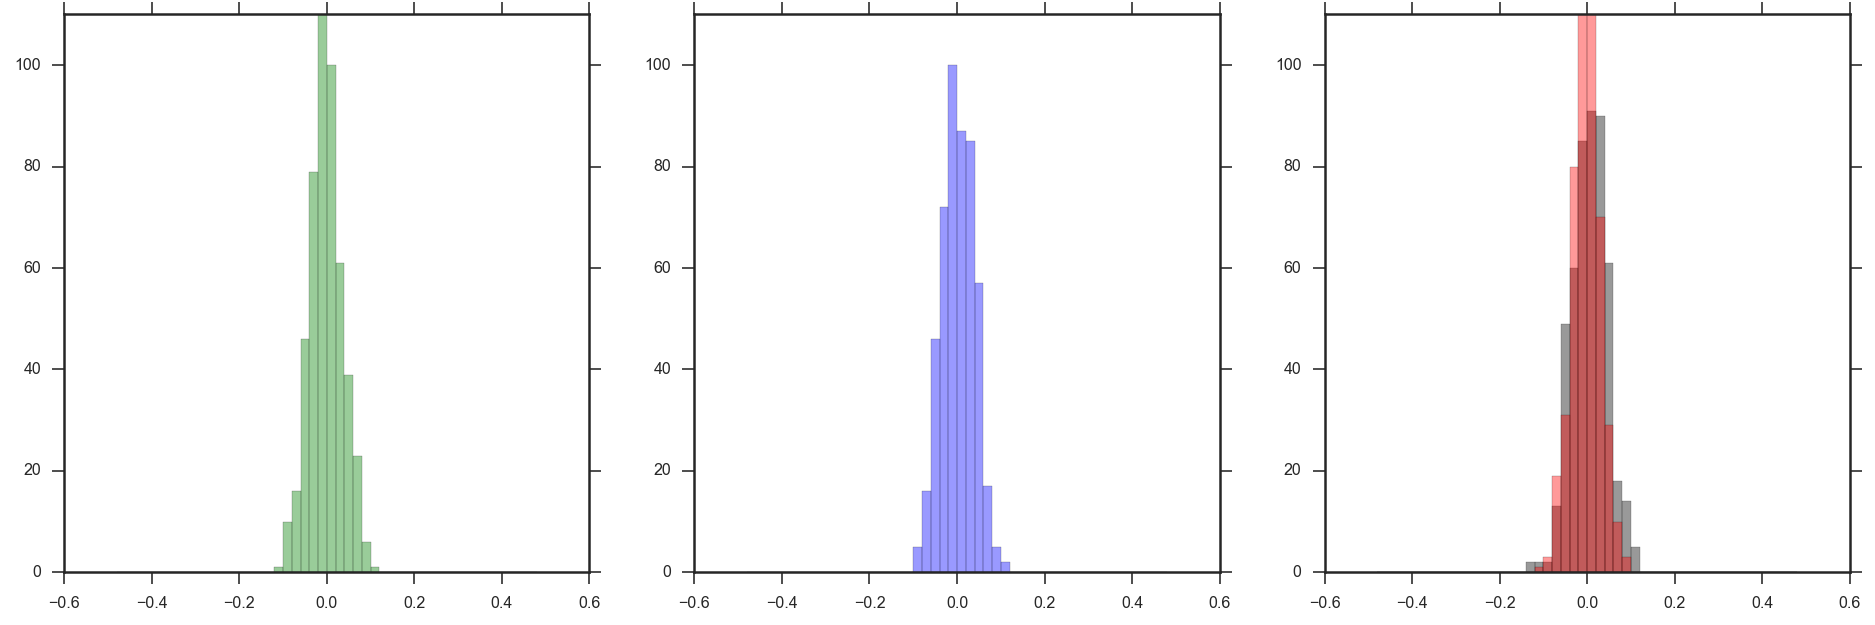

In [22]:
plt.figure(figsize=(16, 5))
plt.subplot(131)
sns.distplot(nz_draw.rvs(), bins=np.arange(-0.5, 0.5, 0.02), color='g', kde=False)
plt.ylim(0, 110)
plt.subplot(132)
sns.distplot(nz_draw_d.rvs(), bins=np.arange(-0.5, 0.5, 0.02), color='b', kde=False)
plt.ylim(0, 110)
plt.subplot(133)
sns.distplot(resid, bins=np.arange(-0.5, 0.5, 0.02), color='k', kde=False)
sns.distplot(nz_draw_o.rvs(), bins=np.arange(-0.5, 0.5, 0.02), color='r', kde=False)
plt.ylim(0, 110)

That's strange... the sigAmp term should make the red and blue distributions different...

In [23]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size/2:]

/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


(-0.4, 1.0)

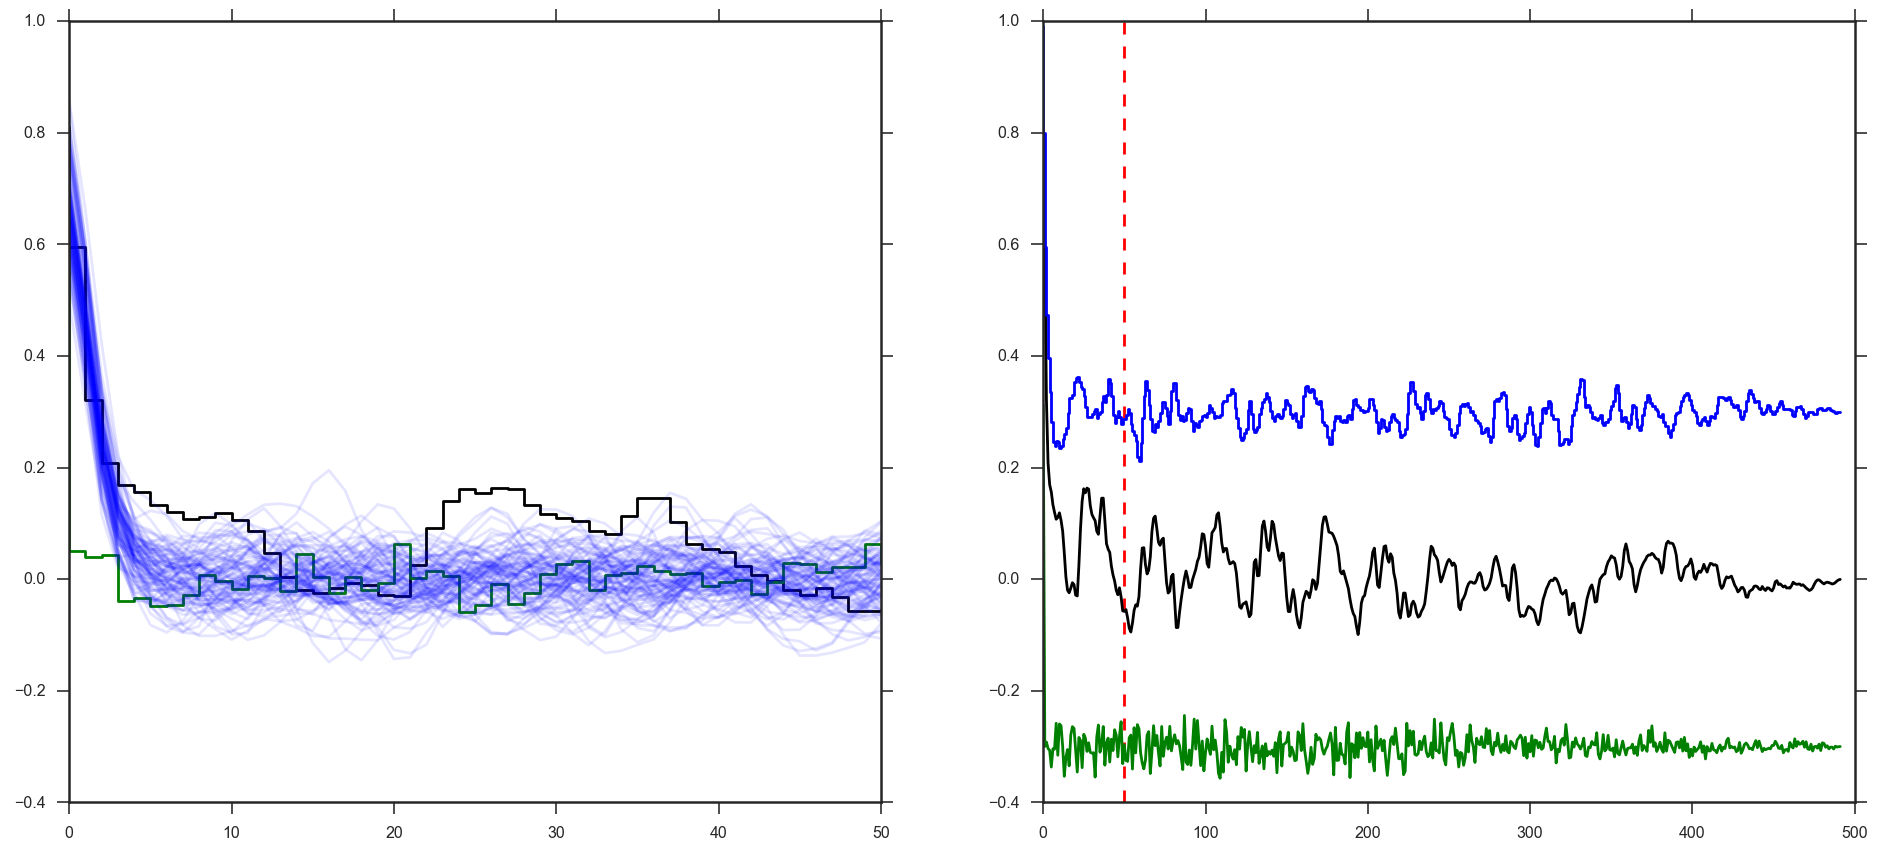

In [24]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
plt.step(autocorr(resid), 'k')
plt.step(autocorr(nz_draw_o.rvs()), 'g')
#plt.step(autocorr(nz_draw_d.rvs()), 'r')

for i in range(100):
    plt.plot(autocorr(nz_draw.rvs()), 'b', alpha=0.1)
plt.xlim(0, 50)
plt.ylim(-0.4, 1.0)

plt.subplot(122)
plt.plot(autocorr(resid), 'k')
plt.plot(autocorr(nz_draw_o.rvs())-0.3, 'g')
#plt.step(autocorr(nz_draw_d.rvs()), 'r')
plt.step(autocorr(nz_draw.rvs())+0.3, 'b')
plt.vlines(50.0, -0.4, 1.0, colors='r', linestyles='dashed')
plt.ylim(-0.4, 1.0)
#plt.ylim(-5e10, 5e10)

Seems *reasonable*, albeit not *perfect*.  The main feature is the ~4 pixel slit size which seems to be accurately captured.  The data seems to have an extended shoulder that I do not see, but this could be random noise...

In [25]:
zz =nz_draw.rvs()

In [26]:
from matplotlib.ticker import FixedLocator

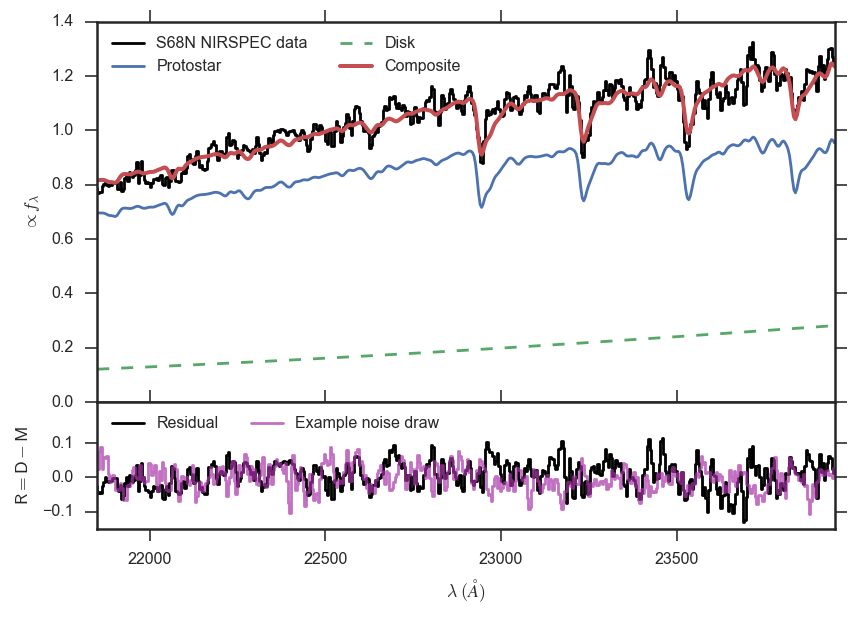

In [27]:
nz_draw = multivariate_normal(net_model, CC) # undo the mean subtraction override...
this_draw = nz_draw.rvs()
this_comp = star+disk

fig1 = plt.figure()
frame1=fig1.add_axes((.1,.3,.8,.6))
frame1.step(wl, fl, 'k', label='S68N NIRSPEC data')
frame1.plot(wl, star, label = 'Protostar')
frame1.plot(wl, disk, '--', label = 'Disk')
#plt.plot(wl, extinc, label = 'extinction')
#plt.plot(wl, cheb, label = 'cheb')
frame1.plot(wl, this_comp, label = 'Composite', lw=2)
plt.xlim(wl[0], wl[-1])
plt.ylabel(r'$ \propto f_\lambda $')
frame1.legend(loc='upper left', ncol=2)
frame2=fig1.add_axes((.1,.1,.8,.2))   
frame2.step(wl, resid, 'k', label='Residual')
frame2.step(wl, this_draw-this_comp, alpha=0.7, color='#AA33AA', label='Example noise draw')
#frame2.hlines(0, wl[0], wl[-1], colors='#AA0000', linestyles='solid', lw=1)
frame2.set_xlim(wl[0], wl[-1])
frame2.set_ylim(-0.15, 0.22)
frame2.yaxis.set_major_locator(FixedLocator([-0.1, 0.0, 0.1]))
frame2.set_ylabel('$\mathsf{R} = \mathsf{D}-\mathsf{M}$')
frame2.legend(loc='upper left', ncol=2)
frame2.set_xlabel('$\lambda \; (\AA)$')
plt.savefig('../document/figures/S68N_spectrum.pdf', bbox_inches='tight')

Good good!  Very reasonable.